# GEODATA Clustering 

The Data used in this notebook contains the geographic location of a number of ATMs in the Berlin area.
We can use this data to form clusters for further analysis

Import the relevant libraries

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame
import json
sns.set()
from sklearn.cluster import KMeans

Load the data

Since we are dealing with a Json file format, we will need to convert it into a dataframe 

In [37]:
# Load the data
with open ('berlin_atms.json') as data_file:
 raw_data = json.load(data_file)

#Convert data into a data frame
 raw_data = DataFrame(raw_data)
    
# Check the data
raw_data

,type,id,lat,lon,tags
0,node,28968292,52.486668,13.319723,"{'addr:city': 'Berlin', 'addr:country': 'DE', ..."
1,node,28968295,52.489024,13.322494,"{'amenity': 'bank', 'name': 'Postbank AG', 'op..."
2,node,60848449,52.531741,13.469267,"{'amenity': 'atm', 'name': 'Deutsche Bank', 'o..."
3,node,60848455,52.530339,13.471082,"{'addr:city': 'Berlin', 'addr:housenumber': '1..."
4,node,60852951,52.524584,13.465439,"{'amenity': 'bank', 'atm': 'yes', 'name': 'Ber..."
...,...,...,...,...,...
1114,node,6010650298,52.440239,13.595590,"{'amenity': 'atm', 'opening_hours': '24/7', 'o..."
1115,node,6037152592,52.510562,13.437402,"{'amenity': 'atm', 'currency:others': 'no', 'o..."
1116,node,6044549331,52.508871,13.378956,"{'amenity': 'bank', 'name': 'Deutsche Bank', '..."
1117,node,6044549333,52.508887,13.377730,"{'amenity': 'bank', 'atm': 'yes', 'name': 'Ber..."


Remove the duplicate index column from the dataset.

In [21]:
data = raw_data.copy()

# Plot the data

Plot the 'Longtitude' and 'Latitude' columns.

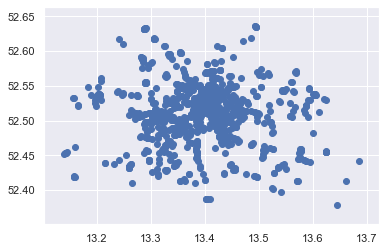

In [26]:
plt.scatter(data['lon'], data['lat'])

plt.show()

# Select the features

Create a copy of that data and remove all parameters apart from Longitude and Latitude.

In [28]:
x = data.iloc[:,2:4]
x

,lat,lon
0,52.486668,13.319723
1,52.489024,13.322494
2,52.531741,13.469267
3,52.530339,13.471082
4,52.524584,13.465439
...,...,...
1114,52.440239,13.595590
1115,52.510562,13.437402
1116,52.508871,13.378956
1117,52.508887,13.377730


# Clustering

Here's the actual solution:

Simply change kmeans = KMeans(2) to kmeans = KMeans(3) .

Then run the remaining kernels until the end.

In [38]:
kmeans = KMeans(4)

In [39]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

# Clustering Resutls

In [40]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([3, 3, 1, ..., 1, 1, 1], dtype=int32)

In [41]:
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,type,id,lat,lon,tags,Cluster
0,node,28968292,52.486668,13.319723,"{'addr:city': 'Berlin', 'addr:country': 'DE', ...",3
1,node,28968295,52.489024,13.322494,"{'amenity': 'bank', 'name': 'Postbank AG', 'op...",3
2,node,60848449,52.531741,13.469267,"{'amenity': 'atm', 'name': 'Deutsche Bank', 'o...",1
3,node,60848455,52.530339,13.471082,"{'addr:city': 'Berlin', 'addr:housenumber': '1...",1
4,node,60852951,52.524584,13.465439,"{'amenity': 'bank', 'atm': 'yes', 'name': 'Ber...",1
...,...,...,...,...,...,...
1114,node,6010650298,52.440239,13.595590,"{'amenity': 'atm', 'opening_hours': '24/7', 'o...",0
1115,node,6037152592,52.510562,13.437402,"{'amenity': 'atm', 'currency:others': 'no', 'o...",1
1116,node,6044549331,52.508871,13.378956,"{'amenity': 'bank', 'name': 'Deutsche Bank', '...",1
1117,node,6044549333,52.508887,13.377730,"{'amenity': 'bank', 'atm': 'yes', 'name': 'Ber...",1


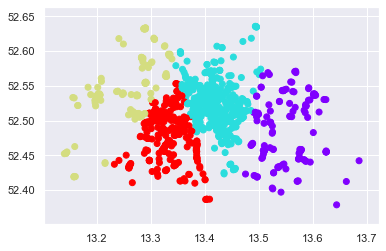

In [42]:
plt.scatter(data['lon'], data['lat'],c=data_with_clusters['Cluster'], cmap = 'rainbow')
plt.show()